# Introduction/Business problem

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_590928f7f599463397dc68aaee279193 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TGpEV3YR--A7xLNQBKrl0ImR7rQnMoy7bmn4cpb_e3DG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_590928f7f599463397dc68aaee279193.get_object(Bucket='arunasfirstproject-donotdelete-pr-gw4xfiuqojl49x',Key='Number_of_restaurants_per_100,000_population_8112018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,City,Figure,Per capita,Date,Source,Notes
0,Amsterdam,53.4,NaN,2013,Trade Association for Horeca and Catering,NaN
1,Austin,207.2,NaN,2018,Restaurant Guide - Austin Chronicle,NaN
2,Bogotá,418.6,NaN,2017,Cámara de Comercio de Bogotá,NaN
3,Brussels,360.4,NaN,2013,FOD Economie ADSEI,NaN
4,Buenos Aires,221.3,NaN,2016,FEHGRA,NaN


In [53]:
df = df_data_2[['City','Figure']]

In [74]:
df

,City,Figure
0,Amsterdam,53.4
1,Austin,207.2
2,Bogotá,418.6
3,Brussels,360.4
4,Buenos Aires,221.3
5,Dublin,32.0
6,Edinburgh,27.7
7,Helsinki,23.3
8,Hong Kong,185.5
9,Istanbul,7.9


In [65]:
df["Figure"] = df.Figure.convert_objects(convert_numeric=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [64]:
df["Figure"] = df.Figure.astype(float)

ValueError: could not convert string to float: '1,099.5'

In [63]:
df['Figure'] = df['Figure'].astype('float64')

ValueError: could not convert string to float: '1,099.5'

In [66]:
df['Figure'] = pd.to_numeric(df['Figure'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [72]:
df.Figure

0       53.4
1      207.2
2      418.6
3      360.4
4      221.3
5       32.0
6       27.7
7       23.3
8      185.5
9        7.9
10     132.4
11    1256.0
12     201.1
13     290.8
14     200.1
15      95.2
16     636.2
17     212.0
18      24.5
19     309.6
20      59.4
21     366.6
22     477.0
23     457.4
24     848.2
25     503.7
26      24.8
27     108.3
28     400.4
29     307.6
30       NaN
31     272.5
Name: Figure, dtype: float64

In [81]:
df.sort_values('Figure')

,City,Figure
9,Istanbul,7.9
7,Helsinki,23.3
18,Moscow,24.5
26,Singapore,24.8
6,Edinburgh,27.7
5,Dublin,32.0
0,Amsterdam,53.4
20,Oslo,59.4
15,Melbourne,95.2
27,Stockholm,108.3


In [86]:
df.Figure.describe

<bound method NDFrame.describe of 0       53.4
1      207.2
2      418.6
3      360.4
4      221.3
5       32.0
6       27.7
7       23.3
8      185.5
9        7.9
10     132.4
11    1256.0
12     201.1
13     290.8
14     200.1
15      95.2
16     636.2
17     212.0
18      24.5
19     309.6
20      59.4
21     366.6
22     477.0
23     457.4
24     848.2
25     503.7
26      24.8
27     108.3
28     400.4
29     307.6
30       NaN
31     272.5
Name: Figure, dtype: float64>

In [83]:
df.tail(5)

,City,Figure
27,Stockholm,108.3
28,Sydney,400.4
29,Taipei,307.6
30,Tokyo,NaN
31,Toronto,272.5


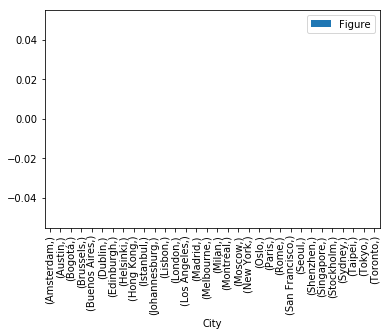

In [73]:
from matplotlib import pyplot as plt
plotdata = pd.DataFrame(
    {"Figure": df.Figure}, 
    index=[df.City])
# Plot a bar chart
plotdata.plot(kind="bar")

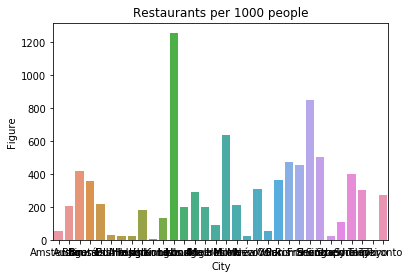

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
nyc_chart = sns.barplot(x="City",
                         y="Figure",
                         data= df
                         ).set_title('Restaurants per 1000 people')
plt.show()

In [23]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='number/1000 people')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('#')
ax.set_title('# of restaurants in cities')
ax.set_xticks('City')
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

NameError: name 'labels' is not defined

In [58]:
dfm=df_data_2

In [67]:
dfm.head()

,City,Figure,Per capita,Date,Source,Notes
0,Amsterdam,53.4,NaN,2013,Trade Association for Horeca and Catering,NaN
1,Austin,207.2,NaN,2018,Restaurant Guide - Austin Chronicle,NaN
2,Bogotá,418.6,NaN,2017,Cámara de Comercio de Bogotá,NaN
3,Brussels,360.4,NaN,2013,FOD Economie ADSEI,NaN
4,Buenos Aires,221.3,NaN,2016,FEHGRA,NaN


In [71]:
import matplotlib.pyplot as plt
import pandas as pd

dfm.plot(kind='bar', x=dfm[City], y=df[Figure])
plt.show()

NameError: name 'City' is not defined



Capstone assignment -Aruna

11-May-2020

Opportunity Assessment for Capstone project using Foursquare API.

Introduction -

We have been hired by the Mayor of Mississauga to assist in approval for a request to set up Italian restaurant in South missisauga neighbourhood.
We plan to use the Foursquare Api to help the mayor with the decision. we will analyze the are for existing businesses and provide guidance with fact s on the area.

Process -
We will map the neighbourhood for nearest Coffee shops, Restaurants and entertainment areas.
this will help in deciding the zoning.
We will create an account in Foursquare api.
We will obtain the client ID and Secret after registering with foursquare.
we will run a search query to see if there are any italian restaurants in the neighbourhood.
this result will then be loaded on a Pandas Dataframe.
Using Folium Maps we will visualize this data and explore the venue.

the report with the maps will be presented to the Mayors office, so they can make a decision if another italian restaurant is required in the area.

after a zoning location is decided we can also use K means to find the best locations that will be equidistant from major attractions in the area. this will ensure all public has access to this new Italian restaurant.

In [55]:
df_data_1 = pd.read_csv(body)
df_data_1.head()

NameError: name 'body' is not defined

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import geopy




from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import os



print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'WTUDUXM1UNC4YJ2YQV3BJWQXFXD4XFSMFR4Z0BAJWIGLLAEA' # your Foursquare ID
CLIENT_SECRET = 'C4SCID4BHMU1CNT4XUTRIJKW1QMMLTQPPODXGCPYHL5USAGV' # your Foursquare Secret
VERSION = '20200515'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WTUDUXM1UNC4YJ2YQV3BJWQXFXD4XFSMFR4Z0BAJWIGLLAEA
CLIENT_SECRET:C4SCID4BHMU1CNT4XUTRIJKW1QMMLTQPPODXGCPYHL5USAGV


In [3]:

address = '1367, Queen Victoria avenue, Mississauga, Ontario'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.53498249605366 -79.62144195905238


In [4]:
print(geolocator)

In [5]:
print(geolocator.view_box)

None


In [4]:
search_query = 'Restuarant'
radius = 500
print(search_query + ' .... OK!')

Restuarant .... OK!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=WTUDUXM1UNC4YJ2YQV3BJWQXFXD4XFSMFR4Z0BAJWIGLLAEA&client_secret=C4SCID4BHMU1CNT4XUTRIJKW1QMMLTQPPODXGCPYHL5USAGV&ll=43.53498249605366,-79.62144195905238&v=20200515&radius=500&limit=50'

# DATA used

Data Used for this Capstone assignment- the approach used was to analyze and Scan all the restaurants and small business in the port credit neighborhood.
1. Foursquare Api was used. i registered for the api, created a client id and client secret
2. based on the location in portcredit the latitude and logitude for the location was found byusing geolocator
3. foursqure api was involed for a rasius of 500 around the portcredit location.
4. results were obtained and we got a Json file of 50 records
5. the response was then mapped to a Pandas data frame
6. this data frame was mapped using folium package.
7. the dtaa showed that there are only 3 reastaurants in this are - Pizza place, Chinese Retaurant and Suchi restaurant.
8. THERE IS NO ITALIAN restaurant. so a full chance of setting up one in this neighborhood.

In [6]:
results = requests.get(url).json()
results
print (results)

{'meta': {'code': 200, 'requestId': '5ed67c4c963d29001b6a10d3'}, 'response': {'venues': [{'id': '4ca5cc2fd971b1f7e182f9e0', 'name': 'Lorne Park Secondary School', 'location': {'address': '1324 Lorne Park Road', 'crossStreet': 'Truscott', 'lat': 43.53119998536198, 'lng': -79.6240973343538, 'labeledLatLngs': [{'label': 'display', 'lat': 43.53119998536198, 'lng': -79.6240973343538}], 'distance': 472, 'postalCode': 'L5H 3B1', 'cc': 'CA', 'city': 'Mississauga', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1324 Lorne Park Road (Truscott)', 'Mississauga ON L5H 3B1', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d13d941735', 'name': 'High School', 'pluralName': 'High Schools', 'shortName': 'High School', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1591115259', 'hasPerk': False}, {'id': '4dd192991838a75196474e5d', 'name': 'Anytime Fitness', 'location': {'address': '1150 Lorne Park Rd', 'lat'

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4ca5cc2fd971b1f7e182f9e0,1324 Lorne Park Road,CA,Mississauga,Canada,Truscott,472,"[1324 Lorne Park Road (Truscott), Mississauga ...","[{'label': 'display', 'lat': 43.53119998536198...",43.531200,-79.624097,L5H 3B1,ON,Lorne Park Secondary School,v-1591115259,NaN
1,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4dd192991838a75196474e5d,1150 Lorne Park Rd,CA,Mississauga,Canada,NaN,659,"[1150 Lorne Park Rd, Mississauga ON L5H 3A7, C...","[{'label': 'display', 'lat': 43.53051, 'lng': ...",43.530510,-79.616090,L5H 3A7,ON,Anytime Fitness,v-1591115259,NaN
2,"[{'id': '4f04b1572fb6e1c99f3db0bf', 'name': 'S...",False,4f8ef556e4b0d35b8089ad22,2330 South Sheridan Way,CA,Mississauga,Canada,NaN,199,"[2330 South Sheridan Way, Mississauga ON L5J 2...","[{'label': 'display', 'lat': 43.53325357693356...",43.533254,-79.622085,L5J 2M4,ON,Public Storage,v-1591115259,NaN
3,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4e60449b7d8b854088b48470,1150 Lorne Park Dr.,CA,Mississauga,Canada,at Queen Victoria Ave.,639,"[1150 Lorne Park Dr. (at Queen Victoria Ave.),...","[{'label': 'display', 'lat': 43.53103989841665...",43.531040,-79.615677,L5H 3A5,ON,Battaglia's Lorne Park Marketplace,v-1591115259,NaN
4,"[{'id': '4e39a956bd410d7aed40cbc3', 'name': 'T...",False,4f89a94de4b013a980b5dda0,NaN,CA,Mississauga,Canada,NaN,1328,"[Mississauga ON, Canada]","[{'label': 'display', 'lat': 43.54644692756784...",43.546447,-79.625995,NaN,ON,White Oaks Park Tennis Club,v-1591115259,NaN


In [52]:
df.name


0             Lorne Park Secondary School
1                         Anytime Fitness
2                          Public Storage
3      Battaglia's Lorne Park Marketplace
4             White Oaks Park Tennis Club
5                   White Oaks Montessori
6                 Lorne park lecture hall
7                    Lorne Park Jewellers
8                            Stoney Pizza
9                          Pioneer Energy
10                   Konekt - Mississauga
11           Lorne Park Dental Associates
12                    Timjas Thai Chinese
13             The Neziol Insurance Group
14                                Kim gym
15                 Sylvan Learning Centre
16       Humber College Broadcasting Hall
17                            Supperworks
18              Flintstone Glass & Mirror
19                   1381 Lakeshore Rd. E
20                     Thompson dentistry
21                                Grrrrre
22                    Ichiban Sushi House
23                           Petro

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Lorne Park Secondary School,High School,1324 Lorne Park Road,CA,Mississauga,Canada,Truscott,472,"[1324 Lorne Park Road (Truscott), Mississauga ...","[{'label': 'display', 'lat': 43.53119998536198...",43.531200,-79.624097,L5H 3B1,ON,4ca5cc2fd971b1f7e182f9e0
1,Anytime Fitness,Gym / Fitness Center,1150 Lorne Park Rd,CA,Mississauga,Canada,NaN,659,"[1150 Lorne Park Rd, Mississauga ON L5H 3A7, C...","[{'label': 'display', 'lat': 43.53051, 'lng': ...",43.530510,-79.616090,L5H 3A7,ON,4dd192991838a75196474e5d
2,Public Storage,Storage Facility,2330 South Sheridan Way,CA,Mississauga,Canada,NaN,199,"[2330 South Sheridan Way, Mississauga ON L5J 2...","[{'label': 'display', 'lat': 43.53325357693356...",43.533254,-79.622085,L5J 2M4,ON,4f8ef556e4b0d35b8089ad22
3,Battaglia's Lorne Park Marketplace,Grocery Store,1150 Lorne Park Dr.,CA,Mississauga,Canada,at Queen Victoria Ave.,639,"[1150 Lorne Park Dr. (at Queen Victoria Ave.),...","[{'label': 'display', 'lat': 43.53103989841665...",43.531040,-79.615677,L5H 3A5,ON,4e60449b7d8b854088b48470
4,White Oaks Park Tennis Club,Tennis Court,NaN,CA,Mississauga,Canada,NaN,1328,"[Mississauga ON, Canada]","[{'label': 'display', 'lat': 43.54644692756784...",43.546447,-79.625995,NaN,ON,4f89a94de4b013a980b5dda0
5,White Oaks Montessori,None,1200 Vanier Dr,CA,Mississauga,Canada,NaN,978,"[1200 Vanier Dr, Mississauga ON L5H 4C7, Canada]","[{'label': 'display', 'lat': 43.543138, 'lng':...",43.543138,-79.625967,L5H 4C7,ON,4d6ebdc43d6a224b00070f85
6,Lorne park lecture hall,High School,NaN,CA,Mississauga,Canada,NaN,804,"[Mississauga ON, Canada]","[{'label': 'display', 'lat': 43.53504016311795...",43.535040,-79.611473,NaN,ON,4ed661732c5b3d826ea12db7
7,Lorne Park Jewellers,Jewelry Store,20-1107 Lorne Park Rd,CA,Mississauga,Canada,Lorne Park Road and Lakeshore Road W,805,[20-1107 Lorne Park Rd (Lorne Park Road and La...,"[{'label': 'display', 'lat': 43.531459, 'lng':...",43.531459,-79.612724,L5H 3A1,ON,50db7f0f29a6c455b68206dd
8,Stoney Pizza,Pizza Place,1200 Vanier Dr,CA,Mississauga,Canada,NaN,945,"[1200 Vanier Dr, Mississauga ON L5H 4C7, Canada]","[{'label': 'display', 'lat': 43.542743, 'lng':...",43.542743,-79.626208,L5H 4C7,ON,520bedfd11d22b2273e5dfb6
9,Pioneer Energy,Gas Station,1095 Lakeshore Rd W,CA,Mississauga,Canada,Lorne Park Rd,1142,"[1095 Lakeshore Rd W (Lorne Park Rd), Mississa...","[{'label': 'display', 'lat': 43.531594, 'lng':...",43.531594,-79.608081,L5H 1J3,ON,4b78aa73f964a520e7dc2ee3


In [54]:
df.describe

<bound method NDFrame.describe of                                    name                   categories  \
0           Lorne Park Secondary School                  High School   
1                       Anytime Fitness         Gym / Fitness Center   
2                        Public Storage             Storage Facility   
3    Battaglia's Lorne Park Marketplace                Grocery Store   
4           White Oaks Park Tennis Club                 Tennis Court   
5                 White Oaks Montessori                         None   
6               Lorne park lecture hall                  High School   
7                  Lorne Park Jewellers                Jewelry Store   
8                          Stoney Pizza                  Pizza Place   
9                        Pioneer Energy                  Gas Station   
10                 Konekt - Mississauga                         None   
11         Lorne Park Dental Associates             Dentist's Office   
12                  Timjas Tha

In [10]:
df = dataframe_filtered

In [12]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import sys
!{sys.executable} -m pip install folium


     |████████████████████████████████| 102kB 7.4MB/s ta 0:00:011


In [14]:
import folium

In [17]:
m = folium.Map(location=[latitude, longitude],
                       width=750, height=500)

In [18]:
m

In [20]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add a red circle marker to represent my house in portcredit
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='My house',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the businesses as blue circle markers
for lat, lng, label in zip(df.lat, df.lng, df.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [21]:
df.categories

0                     High School
1            Gym / Fitness Center
2                Storage Facility
3                   Grocery Store
4                    Tennis Court
5                            None
6                     High School
7                   Jewelry Store
8                     Pizza Place
9                     Gas Station
10                           None
11               Dentist's Office
12             Chinese Restaurant
13                           None
14                           None
15                         School
16              College Classroom
17                           None
18                           None
19                           None
20                           None
21            Government Building
22               Sushi Restaurant
23                    Gas Station
24                Automotive Shop
25                   Music School
26                        Parking
27    Professional & Other Places
28                        Parking
29            

In [49]:
df.categories

0                     High School
1            Gym / Fitness Center
2                Storage Facility
3                   Grocery Store
4                    Tennis Court
5                            None
6                     High School
7                   Jewelry Store
8                     Pizza Place
9                     Gas Station
10                           None
11               Dentist's Office
12             Chinese Restaurant
13                           None
14                           None
15                         School
16              College Classroom
17                           None
18                           None
19                           None
20                           None
21            Government Building
22               Sushi Restaurant
23                    Gas Station
24                Automotive Shop
25                   Music School
26                        Parking
27    Professional & Other Places
28                        Parking
29            

In [51]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add a red circle marker to represent my house in portcredit
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='My house',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the businesses as blue circle markers
for lat, lng, label in zip(df.lat, df.lng, df.categories == "Pizza Place"):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map